In [2]:
import pickle

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Default parameter for matplotlib
mpl.rcParams['figure.dpi'] = 100

In [3]:
with open('/home/chenghung/DoTA/input/rf_data/human_weight_rf_data.pickle', mode='rb') as fh:
    x_data, y, tf_list = pickle.load(fh)

In [4]:
# Create psi table
psi_df = y.pivot(index='Gene', columns='Tissue')['PSI']

In [5]:
# Remove genes with less than 3 events
psi_df = psi_df[psi_df.notna().sum(axis=1) > 2]

# Calculate stdev
psi_stdev = psi_df.std(axis=1, ddof=0)

# Drop genes with no stdev across different tissues
keep_idx = psi_stdev[psi_stdev != 0].index
psi_df = psi_df.loc[keep_idx]
psi_stdev = psi_stdev[keep_idx]
psi_mean = psi_df.mean(axis=1)

In [6]:
# Calculate psi range of each genes
psi_range = psi_df.max(axis=1) - psi_df.min(axis=1)

In [7]:
gene_remain = []
cutoffs = np.arange(0, 1.05, 0.05)
for cutoff in cutoffs:
    gene_remain.append((psi_range >= cutoff).sum())
gene_remain_df = pd.DataFrame(gene_remain, index=cutoffs, columns=['Count'])

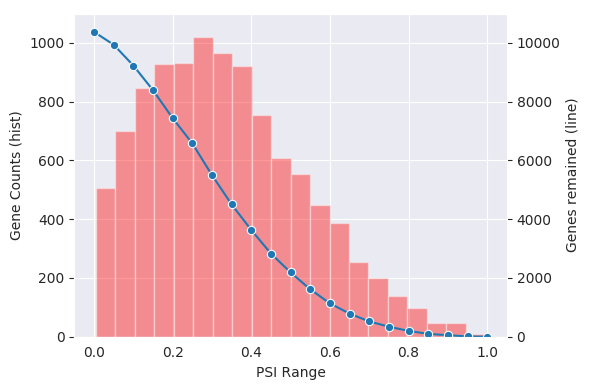

In [8]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    plt.xlabel('PSI Range')

    # Histogram of psi range distribution
    sns.distplot(psi_range, kde=False, norm_hist=False, bins=20, ax=ax, color='r')
    ax.set_ylabel('Gene Counts (hist)')
    ax.set_ylim(0, 1100)

    # Lineplot of genes remained after filtering by each psi-range criteria
    ax2 = plt.twinx()
    sns.lineplot(data=gene_remain_df, markers='o', legend=False, ax=ax2)
    ax2.set_ylabel('Genes remained (line)')
    ax2.set_ylim(0, 11000)
    ax2.grid(None)

    fig.tight_layout()
    # fig.savefig('cutoff_gene_remains.png', dpi=300)
    plt.show()

## Cut-off genes with PSI range < 0.2

In [75]:
with open('/home/chenghung/DoTA/input/rf_data/human_weight_rf_data.pickle', mode='rb') as fh:
    x_data, y, tf_list = pickle.load(fh)

In [76]:
# Create psi table
psi_df = y.pivot(index='Gene', columns='Tissue')['PSI']

In [77]:
# Cut-off genes with psi range < 0.2
psi_range = psi_df.max(axis=1) - psi_df.min(axis=1)
gene_remained_list = psi_range[psi_range >= 0.2]
psi_df = psi_df[psi_df.index.isin(gene_remained_list.index)]

In [78]:
# Remove genes with less than 3 events
psi_df = psi_df[psi_df.notna().sum(axis=1) > 2]

In [79]:
filtered_y = y[y['Gene'].isin(psi_df.index)]

In [85]:
filtered_x_data = x_data[filtered_y.index]
filtered_y.reset_index(drop=True, inplace=True)

In [91]:
# Regenerate data with filtered one
with open('/home/chenghung/DoTA/input/rf_data/human_weight_rf_data_filtered.pickle', mode='wb') as fh:
    pickle.dump((filtered_x_data, filtered_y, tf_list), fh)